(52.3671947, 4.919245)
(52.3862001, 4.8812058)


C:\Users\quent\AppData\Local\Temp\ipykernel_17252\2382852422.py:14: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


(3781170134, 55.4897645320106) (305081090, 54.87161258524928)
Node found.
Node found.


C:\Users\quent\AppData\Local\Temp\ipykernel_17252\2382852422.py:37: UserWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in a future release. Use the `route_to_gdf` function instead.
  length = sum(ox.utils_graph.get_route_edge_attributes(canals, path, 'length'))


[3781170134, 323929882, 331854233, 8010136114, 252142901, 324827507, 305155548, 305155547, 305156166, 8003741421, 9407684484, 324128505, 324126395, 1195429031, 730950175, 277138134, 178261171, 60740843, 117738457, 154546029, 305084168, 305082709, 305081090]
12
324126395
{'y': 52.3768364, 'x': 4.9027817, 'street_count': 3}
5004.24


C:\Users\quent\AppData\Local\Temp\ipykernel_17252\2382852422.py:63: UserWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in a future release. Use the `route_to_gdf` function instead.
  lengths = ox.utils_graph.get_route_edge_attributes(canals, path, 'length')


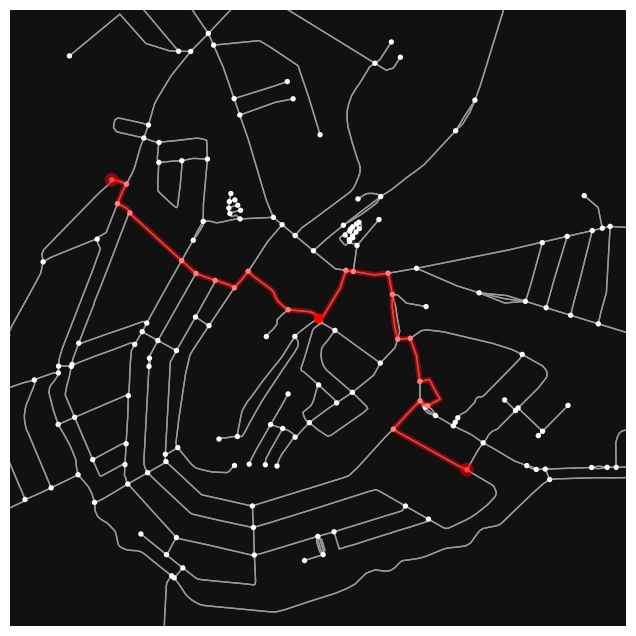

In [47]:
import osmnx as ox
import networkx as nx
import math

#Find coordinates of Artis (start point)
location_ARTIS = ox.geocode("Entrepotdok 86, Amsterdam, Netherlands")
print(location_ARTIS)

#Find coordinates of Westerpark (end point)
location_Westerpark = ox.geocode("Westerpark 1, Amsterdam, Netherlands")
print(location_Westerpark)

#This gets all the canal data from Amsterdam
ox.config(use_cache=True, log_console=True)
canals = ox.graph_from_place('Amsterdam', retain_all=False, truncate_by_edge=False,
                        simplify=True, custom_filter='["waterway"~"canal"]')


#Find the nearest nodes nearest node
nodes_ARTIS = ox.distance.nearest_nodes(canals, location_ARTIS[1], location_ARTIS[0], return_dist=True)
nodes_point2 = ox.distance.nearest_nodes(canals, location_Westerpark[1], location_Westerpark[0], return_dist=True)
print(nodes_ARTIS, nodes_point2)

#Check if nodes exist
if nodes_ARTIS[0] in canals.nodes:
    print("Node found.")
if nodes_point2[0] in canals.nodes:
    print("Node found.")

#Shortest path between the two points
#path = ox.shortest_path(canals, nodes_ARTIS[0], nodes_point2[0])

#This loop ensures a route is found between the start and end point of at least 5000m
L = 5000 #The route is 5000m long
path = ox.k_shortest_paths(canals, nodes_ARTIS[0], nodes_point2[0], 1000, 'length')
for i, path in enumerate(path):
    length = sum(ox.utils_graph.get_route_edge_attributes(canals, path, 'length'))
    if length >= L:
        break
i, length, path

#These are the nodes of the path
print(path)

#Since the path is an odd list, this calculates the middle node
middle_node = math.ceil(len(path) / 2)
print(middle_node) # =12
print(path[middle_node])

#Zoom in with middle point as center for bbox
node_middle = canals.nodes(data=True)[path[middle_node]]
print(node_middle)
bbox = ox.utils_geo.bbox_from_point((node_middle['y'], node_middle['x']), dist=2200)

#Plot graph of canals
pt = ox.graph_to_gdfs(canals, edges=False).unary_union.centroid
fig, ax = ox.plot_graph_route(canals, path, bbox=bbox, show=False, close=False)

#Plots the middle node of route
ax.scatter(canals.nodes[path[12]]['x'], canals.nodes[path[12]]['y'], c='red')

#This calculates the length of the path
lengths = ox.utils_graph.get_route_edge_attributes(canals, path, 'length')
path_length = sum(lengths)
print(path_length)

#shortest_path = nx.shortest_path_length(canals, nodes_ARTIS[0], nodes_point2[0], weight='length')
#print(shortest_path)

#print(canals.nodes[3781170134]['x'], canals.nodes[3781170134]['y'])
#node0 = canals.nodes(data=True)[nodes_ARTIS[0]]
#node1 = canals.nodes(data=True)[nodes_point2[0]]
#print(node0['x'], node0['y'])
#print(node1['x'], node0['y'])


In [48]:
import pandas as pd
import os.path
import re

path = "C:/Users/quent/OneDrive/Documents/GitHub/data_group_9/Assignment 4/TRAMMETRO_PUNTEN_2022.csv"

stops_df = pd.read_csv(path)
print('Columns in file:\n', stops_df.columns)

#stops_nf = bnb_df.loc[(bnb_df['room_type'] != "Private room") & (bnb_df['minimum_nights'] < 8) & (bnb_df['availability_365'] >= 7)]
#print(bnb_nf)

Columns in file:
 Index(['OBJECTNUMMER;Naam;Modaliteit;Lijn;Lijn_select;RADIUS;Label;WKT_LNG_LAT;WKT_LAT_LNG;LNG;LAT;'], dtype='object')
